导入包

In [1]:
import pandas as pd
import re
import math
import pyLDAvis
import pyLDAvis.gensim
import pandas as pd
import os
import re
import numpy as np
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
import pandas as pd
from gensim import models,corpora
import logging
from gensim.similarities import MatrixSimilarity
import matplotlib.pyplot as plt
import jieba.posseg as jp, jieba
import  jieba
import nltk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import glob
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer
from sklearn.metrics import accuracy_score,confusion_matrix,precision_recall_curve,average_precision_score,roc_curve, auc
import collections
%matplotlib inline
plt.rcParams['font.sans-serif'] = ['SimHei']  
plt.rcParams['axes.unicode_minus'] = False  

e:\python_37\lib\site-packages\scipy\fft\__init__.py:97: DeprecationWarning: The module numpy.dual is deprecated.  Instead of using dual, use the functions directly from numpy or scipy.
  from numpy.dual import register_func
e:\python_37\lib\site-packages\scipy\sparse\sputils.py:17: DeprecationWarning: `np.typeDict` is a deprecated alias for `np.sctypeDict`.
  supported_dtypes = [np.typeDict[x] for x in supported_dtypes]
e:\python_37\lib\site-packages\scipy\sparse\sputils.py:17: DeprecationWarning: `np.typeDict` is a deprecated alias for `np.sctypeDict`.
  supported_dtypes = [np.typeDict[x] for x in supported_dtypes]
e:\python_37\lib\site-packages\scipy\sparse\sputils.py:17: DeprecationWarning: `np.typeDict` is a deprecated alias for `np.sctypeDict`.
  supported_dtypes = [np.typeDict[x] for x in supported_dtypes]
e:\python_37\lib\site-packages\scipy\sparse\sputils.py:17: DeprecationWarning: `np.typeDict` is a deprecated alias for `np.sctypeDict`.
  supported_dtypes = [np.typeDict[x] fo

e:\python_37\lib\site-packages\urllib3\_collections.py:2: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Mapping, MutableMapping
e:\python_37\lib\site-packages\scipy\sparse\sparsetools.py:21: DeprecationWarning: `scipy.sparse.sparsetools` is deprecated!
scipy.sparse.sparsetools is a private module for scipy.sparse, and should not be used.
  _deprecated()
e:\python_37\lib\site-packages\sklearn\feature_extraction\image.py:172: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org

In [2]:
import nltk
from nltk.corpus import stopwords
stopword_v1 = stopwords.words('english')

In [3]:
stopword  = stopword_v1

In [4]:
#输出主题词
def lda_return_Dataframe(lda_topic):
    totle = []
    for topic in lda_topic:
        top_l = []
        for i in topic[1].split('+'):
            lda_weiht = i.split('*')[0]
            word = i.split('*')[1].replace('"','').replace(' ','')
            top_l.append(word)
            top_l.append(lda_weiht)
        totle.append(top_l)
    return pd.DataFrame(totle) 

#困惑度
def graph_draw_kunhuo(topic, perplexity):  # 做主题数与困惑度的折线图
    x = topic
    y = perplexity
    plt.plot(x, y, color="red", linewidth=2)
    plt.xlabel("主题数")
    plt.ylabel("困惑度")
    plt.show()

#计算困惑度
def perplexity(ldamodel, testset, dictionary, size_dictionary, num_topics):
    prep = 0.0
    prob_doc_sum = 0.0
    topic_word_list = [] 
    for topic_id in range(num_topics):
        topic_word = ldamodel.show_topic(topic_id, size_dictionary)
        dic = {}
        for word, probability in topic_word:
            dic[word] = probability
        topic_word_list.append(dic)  
    doc_topics_ist = []  
    for doc in testset:
        doc_topics_ist.append(ldamodel.get_document_topics(doc, minimum_probability=0))
    testset_word_num = 0
    for i in range(len(testset)):
        prob_doc = 0.0 
        doc = testset[i]
        doc_word_num = 0  
        for word_id, num in dict(doc).items():
            prob_word = 0.0  
            doc_word_num += num
            word = dictionary[word_id]
            for topic_id in range(num_topics):
                prob_topic = doc_topics_ist[i][topic_id][1]
                prob_topic_word = topic_word_list[topic_id][word]
                prob_word += prob_topic * prob_topic_word
            prob_doc += math.log(prob_word) 
        prob_doc_sum += prob_doc
        testset_word_num += doc_word_num
    prep = math.exp(-prob_doc_sum / testset_word_num)
    return prep
porter = nltk.PorterStemmer()
#德语数据清洗
def set_word(text):
    review=str(text)
    review=re.sub('[^a-zA-Z]',' ',review)
    if len(review) == 0:
        return review
    review = review.lower().split()
    review = [w for w in review if not w in stopword and len(w)>3]
    #review = [porter.stem(t) for t in review]
    return  ' '.join(review)
#最大主题
def get_max_top(doc_list):
    l = [i[1] for i in doc_list]
    mx = np.argmax(l)
    return mx
#获取到最大主题归属的列表
def get_top_list(getpomtopc):
    toplist = []
    for i in getpomtopc:
        tops = get_max_top(i)
        toplist.append(tops)
    return toplist

In [5]:
text_list = []
for j in glob.glob('数据/*'):
    with open(j,encoding='utf8') as f:
        text = f.read()
        text_list+=text.split('\n')

In [6]:
df = pd.DataFrame({})
df['text'] = text_list

In [9]:
df['清洗'] = df['text'].apply(lambda x : set_word(x))

In [10]:
df = df[df['清洗']!='']
df.index = range(df.shape[0])

In [11]:
documents =[]
for i in df['清洗'].values:
    documents.append(i.split(' '))
dictionary=corpora.Dictionary(documents)
corpus=[dictionary.doc2bow(doc) for doc in documents]

In [12]:
def graph_draw_(topic, perplexity):
    x = topic
    y = perplexity
    plt.plot(x, y, color="red", linewidth=2)
    plt.xlabel("主题数")
    plt.ylabel("一致性")
    plt.show()

In [13]:
#一致性
coherence_ldas =[]
a_= range(2,10)
for num_topics in a_:
    lda_model = models.LdaModel(corpus=corpus, id2word=dictionary, random_state=1, num_topics=num_topics)
    coherence_model_lda = CoherenceModel(model=lda_model,texts=documents,dictionary=dictionary, coherence='c_v')
    with np.errstate(invalid='ignore'):
        lda_score = coherence_model_lda.get_coherence()
        coherence_ldas.append(lda_score)

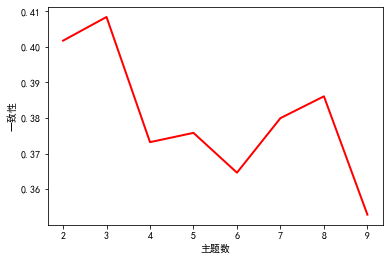

In [132]:
graph_draw_(a_,coherence_ldas)

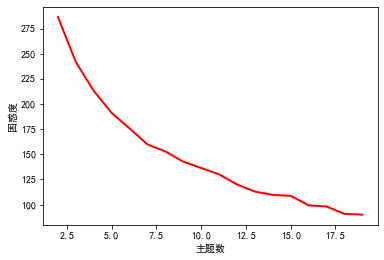

In [133]:
#抽困惑度
a=range(2,20)
p=[]
for num_topics in a:
    lda_model = models.LdaModel(corpus=corpus, id2word=dictionary, random_state=1, num_topics=num_topics)
    prep = perplexity(lda_model, corpus, dictionary, len(dictionary.keys()), num_topics)
    p.append(prep)
graph_draw_kunhuo(a,p)

In [25]:
#lda 主题
num_topics =5
lda = models.LdaModel(corpus=corpus, id2word=dictionary, random_state=1,num_topics=num_topics)
df_lda = lda_return_Dataframe(lda.print_topics(num_words=10))

In [26]:
getpomtopc = lda.get_document_topics(corpus) #获取预料的主题
toplist = get_top_list(getpomtopc)#主题最大归属
df['top'] = toplist
df.to_csv('data/英文数据_lda.csv',encoding ='utf-8-sig')

e:\python_37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [27]:
df_lda.to_csv('data/英文数据_主题词.csv',encoding ='utf-8-sig')

In [28]:
#主题分配
def getTopdic(j):
    yuandic = {}
    for i in range(num_topics):
        yuandic[str(i)] = 0
    for k in j:
        yuandic[str(k[0])] = k[1]
    return yuandic
def get_max_top(doc_list):
    l = [i[1] for i in doc_list]
    k = [i[0] for i in doc_list]
    mx = np.argmax(l)
    return k[mx]

In [29]:
getpomtopc = lda.get_document_topics(corpus)
toplist = []
for i in getpomtopc:
    tops = get_max_top(i)
    toplist.append(tops)
df['topc'] =toplist

e:\python_37\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [19]:
getpomtopc = lda.get_document_topics(corpus)
ALL_CE = []
for j in getpomtopc:
    kk = getTopdic(j)
    ALL_CE.append(kk)

In [20]:
df1 = pd.DataFrame(ALL_CE)
df1

,0,1,2,3,4
0,0.040707,0.040590,0.837638,0.040245,0.040820
1,0.000000,0.000000,0.000000,0.000000,0.975577
2,0.000000,0.000000,0.000000,0.000000,0.971060
3,0.000000,0.966382,0.000000,0.000000,0.000000
4,0.033386,0.033335,0.033396,0.033671,0.866212
...,...,...,...,...,...
86,0.014347,0.942319,0.014299,0.014582,0.014453
87,0.020280,0.020265,0.020229,0.919057,0.020169
88,0.000000,0.000000,0.000000,0.000000,0.971063
89,0.022566,0.022875,0.022260,0.022577,0.909723


In [30]:
df.join(df1).to_csv('data/主题归属保存——英文.csv',encoding ='utf-8-sig')

In [22]:
d = pyLDAvis.gensim.prepare(lda,corpus,dictionary)
pyLDAvis.save_html(d,'data/四象限图——英文.html')

In [23]:
#四象限
# pyLDAvis.enable_notebook()
# vis = pyLDAvis.gensim.prepare(lda, corpus, dictionary)
# vis

In [24]:
#显示四象限图
# pyLDAvis.show(vis)

In [31]:
import collections
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image,ImageSequence
import numpy as np
import  jieba
import jieba.analyse
import jieba.posseg as jp, jieba
import  jieba
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import glob
import jieba.analyse

In [32]:
words_ls = ' '.join(df['清洗'])
word_counts = collections.Counter(words_ls.split())
word_counts_top10 = word_counts.most_common(len(word_counts))
df_ci = pd.DataFrame(word_counts_top10)
df_ci.columns = ['词','总词频数']
df_ci.to_csv('data/词频_英文.csv',encoding ='utf-8-sig')

In [35]:
tf = {}
for i,d in df_ci.iterrows():
    if i < 200:
        tf[d['词']] = d['总词频数']

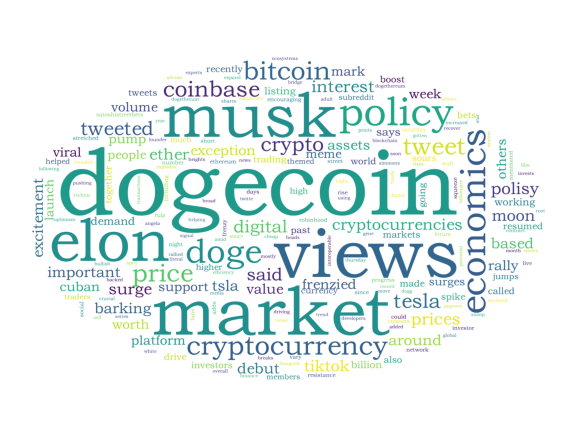

In [36]:
image = Image.open('底图.png')
graph = np.array(image)
text = ''.join(df['清洗'])
wc = WordCloud(font_path='STZHONGS.TTF',scale=10,background_color="white",mask=graph)
wc = wc.generate_from_frequencies(tf)
plt.figure(num=None,figsize=(10,10),facecolor='w',edgecolor='k')
plt.imshow(wc)
plt.axis('off')
plt.savefig('data/词云_.png')
plt.show()